In [26]:
# Import necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r'E:\ML Dataset\LP-1 Dataset\Apriori\Order3.csv')

df.head()

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,10/30/2016 9:58,Morning,Weekend
1,2,Scandinavian,10/30/2016 10:05,Morning,Weekend
2,2,Scandinavian,10/30/2016 10:05,Morning,Weekend
3,3,Hot chocolate,10/30/2016 10:07,Morning,Weekend
4,3,Jam,10/30/2016 10:07,Morning,Weekend


In [5]:

print(df.columns)
print(df.dtypes)

Index(['TransactionNo', 'Items', 'DateTime', 'Daypart', 'DayType'], dtype='object')
TransactionNo     int64
Items            object
DateTime         object
Daypart          object
DayType          object
dtype: object


In [10]:
# Inspect the data structure
print(df.head())
print(df.info())

df = df[['TransactionNo', 'Items']]

   TransactionNo          Items
0              1          Bread
1              2   Scandinavian
2              2   Scandinavian
3              3  Hot chocolate
4              3            Jam
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  20507 non-null  int64 
 1   Items          20507 non-null  object
dtypes: int64(1), object(1)
memory usage: 320.6+ KB
None


In [15]:
# Step 2: Generate the List of Transactions
# -----------------------------------------
# Group items by each transaction to create a list of items bought in each transaction
transactions = df.groupby('TransactionNo')['Items'].apply(list).tolist()

# Convert transactions into a one-hot encoded DataFrame using TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
transaction_df = pd.DataFrame(te_ary, columns=te.columns_)

# Check the resulting one-hot encoded transaction DataFrame
print("\nOne-Hot Encoded Transaction DataFrame:")
print(transaction_df.head())


One-Hot Encoded Transaction DataFrame:
   Adjustment  Afternoon with the baker  Alfajores  Argentina Night  Art Tray  \
0       False                     False      False            False     False   
1       False                     False      False            False     False   
2       False                     False      False            False     False   
3       False                     False      False            False     False   
4       False                     False      False            False     False   

   Bacon  Baguette  Bakewell  Bare Popcorn  Basket  ...  The BART  The Nomad  \
0  False     False     False         False   False  ...     False      False   
1  False     False     False         False   False  ...     False      False   
2  False     False     False         False   False  ...     False      False   
3  False     False     False         False   False  ...     False      False   
4  False     False     False         False   False  ...     False      Fa

In [16]:
# Step 3: Train the Apriori Algorithm on the Dataset
# ---------------------------------------------------
# Apply the Apriori algorithm to find frequent itemsets
# Choose a minimum support threshold (e.g., min_support=0.005 for 0.5% frequency)
frequent_itemsets = apriori(transaction_df, min_support=0.005, use_colnames=True)

# Display the frequent itemsets found by the Apriori algorithm
print("\nFrequent Itemsets:")
print(frequent_itemsets)


Frequent Itemsets:
      support                       itemsets
0    0.036344                    (Alfajores)
1    0.016059                     (Baguette)
2    0.005071                     (Bakewell)
3    0.327205                        (Bread)
4    0.040042                      (Brownie)
..        ...                            ...
109  0.007184      (Coffee, Sandwich, Bread)
110  0.007396           (Coffee, Tea, Bread)
111  0.006867  (Cake, Coffee, Hot chocolate)
112  0.010037            (Cake, Tea, Coffee)
113  0.005388        (Coffee, Tea, Sandwich)

[114 rows x 2 columns]


In [19]:
# Step 4: Generate Association Rules
# -----------------------------------
# If frequent itemsets are found, generate association rules
if not frequent_itemsets.empty:
    # Set a minimum confidence threshold for rule generation (e.g., min_confidence=0.3 for 30%)
    
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3, num_itemsets=10)

    # Display the generated rules with relevant metrics
    print("\nAssociation Rules:")
    print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])
else:
    print("No frequent itemsets found. Try reducing min_support to obtain more itemsets.")


Association Rules:
               antecedents consequents   support  confidence      lift
0              (Alfajores)    (Coffee)  0.019651    0.540698  1.130235
1                    (Jam)     (Bread)  0.005071    0.338028  1.033076
2                 (Pastry)     (Bread)  0.029160    0.338650  1.034977
3                (Brownie)    (Coffee)  0.019651    0.490765  1.025860
4                   (Cake)    (Coffee)  0.054728    0.526958  1.101515
5           (Chicken Stew)    (Coffee)  0.005177    0.398374  0.832732
6                   (Coke)    (Coffee)  0.006445    0.331522  0.692989
7                (Cookies)    (Coffee)  0.028209    0.518447  1.083723
8      (Hearty & Seasonal)    (Coffee)  0.005705    0.540000  1.128777
9          (Hot chocolate)    (Coffee)  0.029583    0.507246  1.060311
10        (Jammie Dodgers)    (Coffee)  0.006656    0.504000  1.053525
11                 (Juice)    (Coffee)  0.020602    0.534247  1.116750
12      (Keeping It Local)    (Coffee)  0.005388    0.809

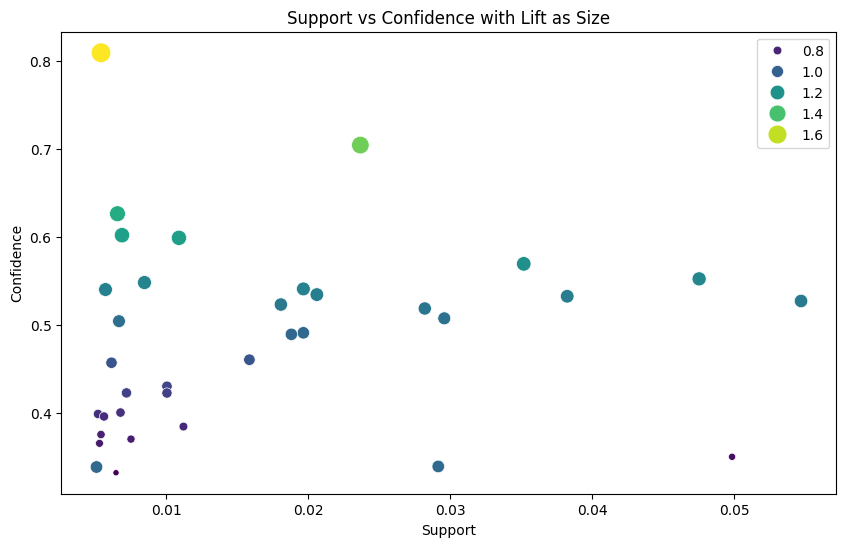

In [27]:
# Step 5: Visualize the Association Rules
# ---------------------------------------
# Check if rules DataFrame is not empty before visualizing
if not frequent_itemsets.empty:
    # Scatter plot to visualize Support vs Confidence with Lift as color and size
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='support', y='confidence', size='lift', hue='lift', data=rules, palette='viridis', sizes=(20, 200))
    plt.title('Support vs Confidence with Lift as Size')
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.legend(loc='best')
    plt.show()
else:
    print("No rules to visualize.")